In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42

In [2]:
github_dir = '/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output'

In [3]:
all_fps = glob.glob(f"{github_dir}/*/result.csv")
all_fps

['/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output/L23_IT_CTX_Glut/result.csv',
 '/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output/Oligo_NN/result.csv',
 '/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output/L6_IT_CTX_Glut/result.csv',
 '/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output/L6_CT_CTX_Glut/result.csv',
 '/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output/CA3_Glut/result.csv',
 '/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output/L5_ET_CTX_Glut/result.csv',
 '/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output/CA1-ProS_Glut/result.csv',
 '/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output/OPC_NN/result.csv',
 '/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output/Astro-TE_NN/result.csv',
 '/home/qzeng_salk_edu/pkg/aging-gene-prediction/ml_output/DG_Glut/result.csv']

In [4]:
all_fps = [
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/Oligo_NN/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/OPC_NN/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/Astro-TE_NN/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/L23_IT_CTX_Glut/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/L6_IT_CTX_Glut/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/L6_CT_CTX_Glut/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/L5_ET_CTX_Glut/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/CA1-ProS_Glut/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/CA3_Glut/result.csv',
        '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/DG_Glut/result.csv']

## plot accu

In [5]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib
# cmap = plt.get_cmap("coolwarm")
# cmap(np.linspace(0, 1, 5))

# adj_coolwarm = LinearSegmentedColormap.from_list("adjusted_coolwarm", (
#     (0.2, (0.2298057 , 0.29871797, 0.75368315)),
#     (0.35, (0.55431187, 0.69009701, 0.99551555)),
#     (0.50, (0.86742764, 0.8643766 , 0.86260246)),
#     (0.65, (0.95665321, 0.59803382, 0.47730229)),
#     (0.8, (0.70567316, 0.01555616, 0.15023281))))

adj_coolwarm = LinearSegmentedColormap.from_list("adjusted_coolwarm", (
    (0.000, (0.2298057 , 0.29871797, 0.75368315)),
    (0.166, (0.55431187, 0.69009701, 0.99551555)),
    (0.333, (0.86742764, 0.8643766 , 0.86260246)),
    (0.666, (0.95665321, 0.59803382, 0.47730229)),
    (1.000, (0.70567316, 0.01555616, 0.15023281))))




In [6]:
all_up_acc = {}
for path in all_fps:
    ml_out = pd.read_csv(path)
    ct = path.split('/')[-2]
    all_acc = ml_out[ml_out['DEG'] == ml_out['pred']].shape[0] / ml_out.shape[0]
    ml_out = ml_out[ml_out['DEG'] != 0]
    deg_acc = ml_out[ml_out['DEG'] == ml_out['pred']].shape[0] / ml_out.shape[0]
    all_up_acc[ct] = (all_acc, deg_acc)

all_up_acc= pd.DataFrame.from_dict(all_up_acc, orient='index', columns=['all_acc', 'deg_acc'])

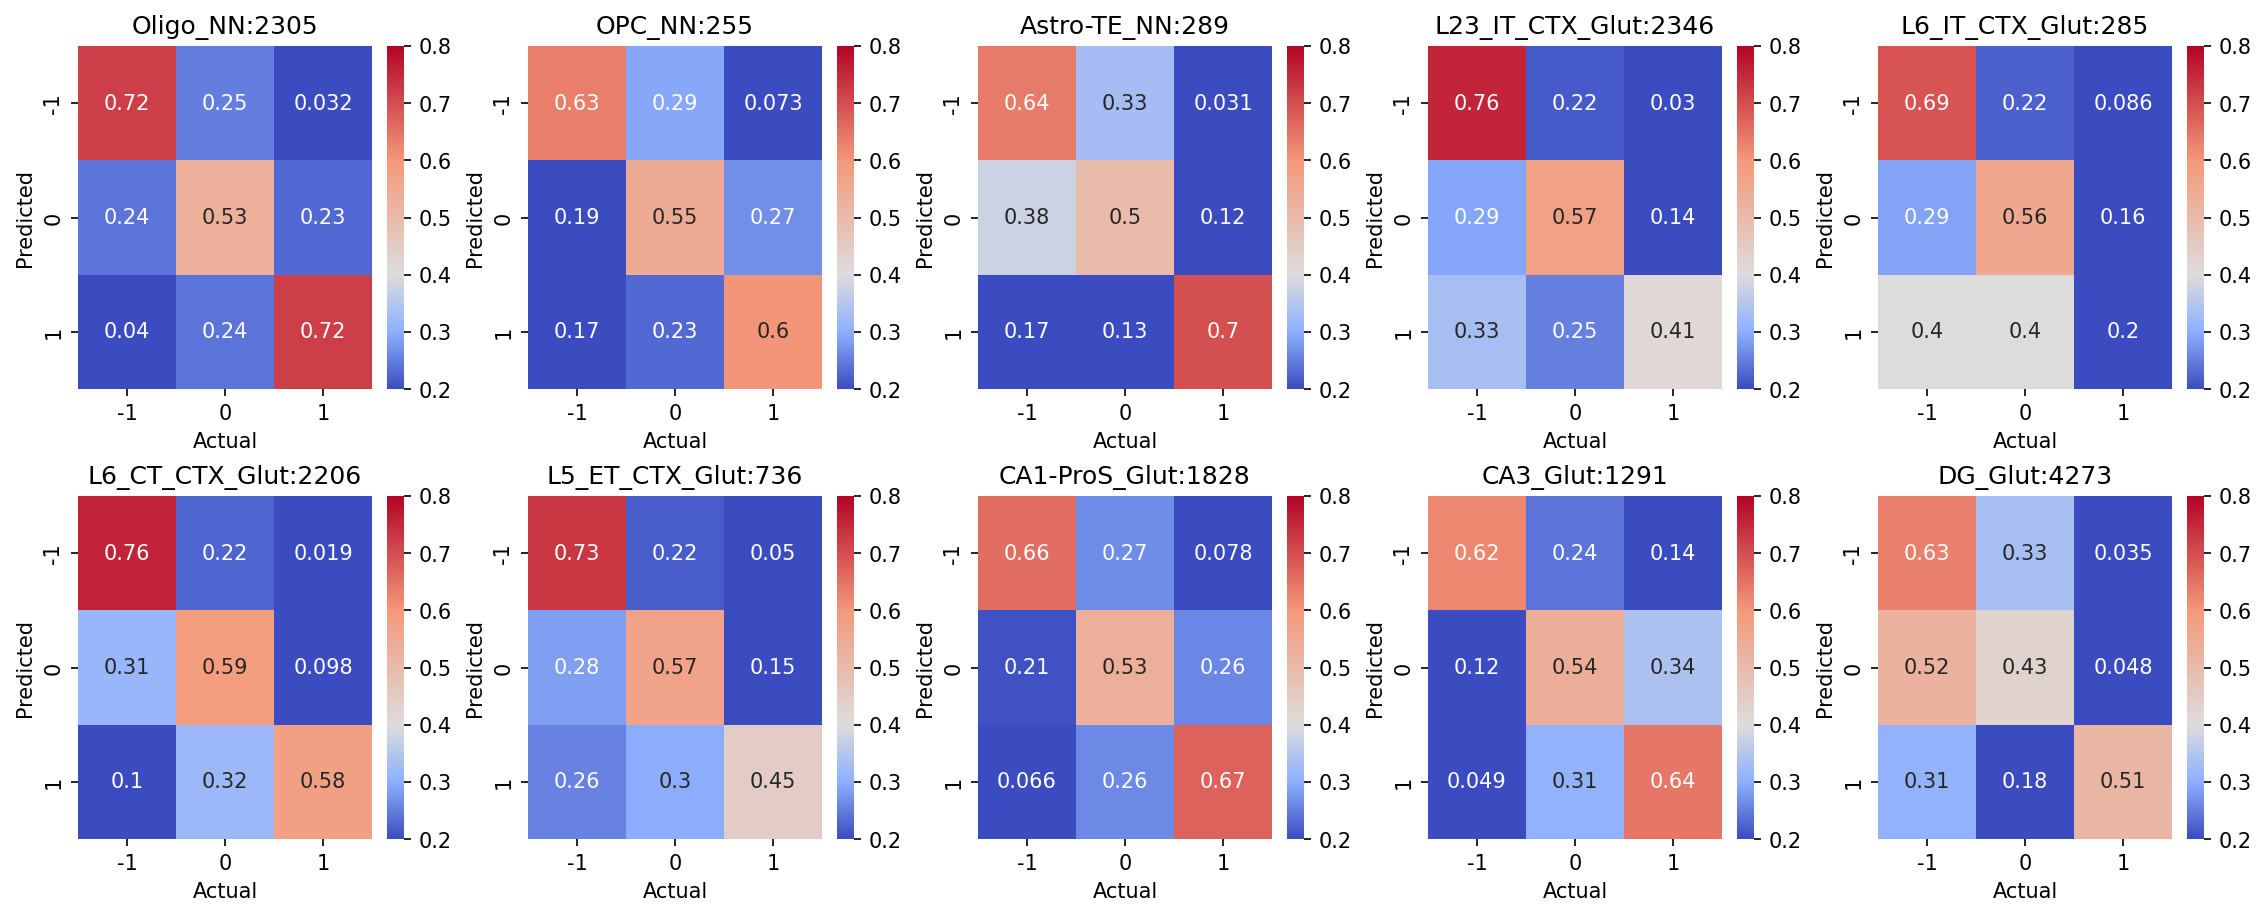

In [7]:
#matplotlib.colormaps.register(adj_coolwarm)

fig, axes = plt.subplots(ncols = 5, nrows =2, figsize=(15, 6), dpi = 150, constrained_layout=True)

for path, ax in zip(all_fps, axes.ravel()):
    ct = path.split('/')[-2]
    ml_out = pd.read_csv(path)
    n_genes = ml_out.shape[0]
    confusion_matrix = pd.crosstab(ml_out['pred'], ml_out['DEG'], rownames=['Predicted'], colnames=['Actual'])
    confusion_matrix = confusion_matrix.div(confusion_matrix.sum(axis=1), axis=0)
    
    sns.heatmap(confusion_matrix, 
            ax =ax,
            cmap = adj_coolwarm,
            vmin = 0.2, vmax = 0.8,
            annot=True)
    ax.set_title(f'{ct}:{n_genes}') 

#fig.savefig('heatmap.accuracy.0-1.pdf', bbox_inches='tight')  

## plot attention weight

In [7]:
import PyComplexHeatmap as pch
from PyComplexHeatmap import *
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42

In [8]:
from matplotlib.backends.backend_pdf import PdfPages

In [9]:
# with PdfPages('no_col_cluster.attention_weight.pdf') as pdf:
#     for path in all_fps:
#         ct = path.split('/')[-2]
#         ml_out = pd.read_csv(path)
#         right_pred = ml_out[ml_out['pred'] == ml_out['DEG']].sort_values('DEG')
#         toplot= right_pred.set_index('gene')[['dmr', 'mcg_genebody', 'mch_genebody', 'atac',
#                     'hic_loop', 'hic_abc_dmr', 'hic_abc_peak']]

#         row_annot = right_pred.set_index('gene')[['DEG']]

#         palette = {-1: '#4287f5', 0: '#ebedf0', 1: '#f50511'}

#         left_ha = pch.HeatmapAnnotation(
#                                 label=pch.anno_label(row_annot.DEG,merge=True,extend=False,
#                                                     adjust_color=True,luminance=0.75,relpos=(1,0.5), colors = 'black'), #,
#                                 DEG_type=pch.anno_simple(row_annot.DEG,legend=True, colors= palette),
#                                 verbose=1,axis=0,plot_legend=False)
        
#         fig = plt.figure(figsize=(5, 6), dpi = 300)
        
#         cm= ClusterMapPlotter(
#                             data=toplot, 
#                             #ax = ax,
#                             left_annotation=left_ha,show_colnames=True,
#                             vmin = 0, vmax = 0.3,
#                             col_cluster=False,row_cluster=False,
#                             label = 'mCG Frac. Change',
#                             cmap='coolwarm',rasterized=True,
#                             #xticklabels_kws={'labelrotation':0,'labelcolor':'blue'}
#                             )
#         plt.suptitle(f"{ct}: {toplot.shape[0]} DEGs")
#         # add ylabel
#         plt.ylabel('Genes')

#         pdf.savefig(fig, bbox_inches = 'tight')  # or you can pass a Figure object to pdf.savefig
#         plt.close()

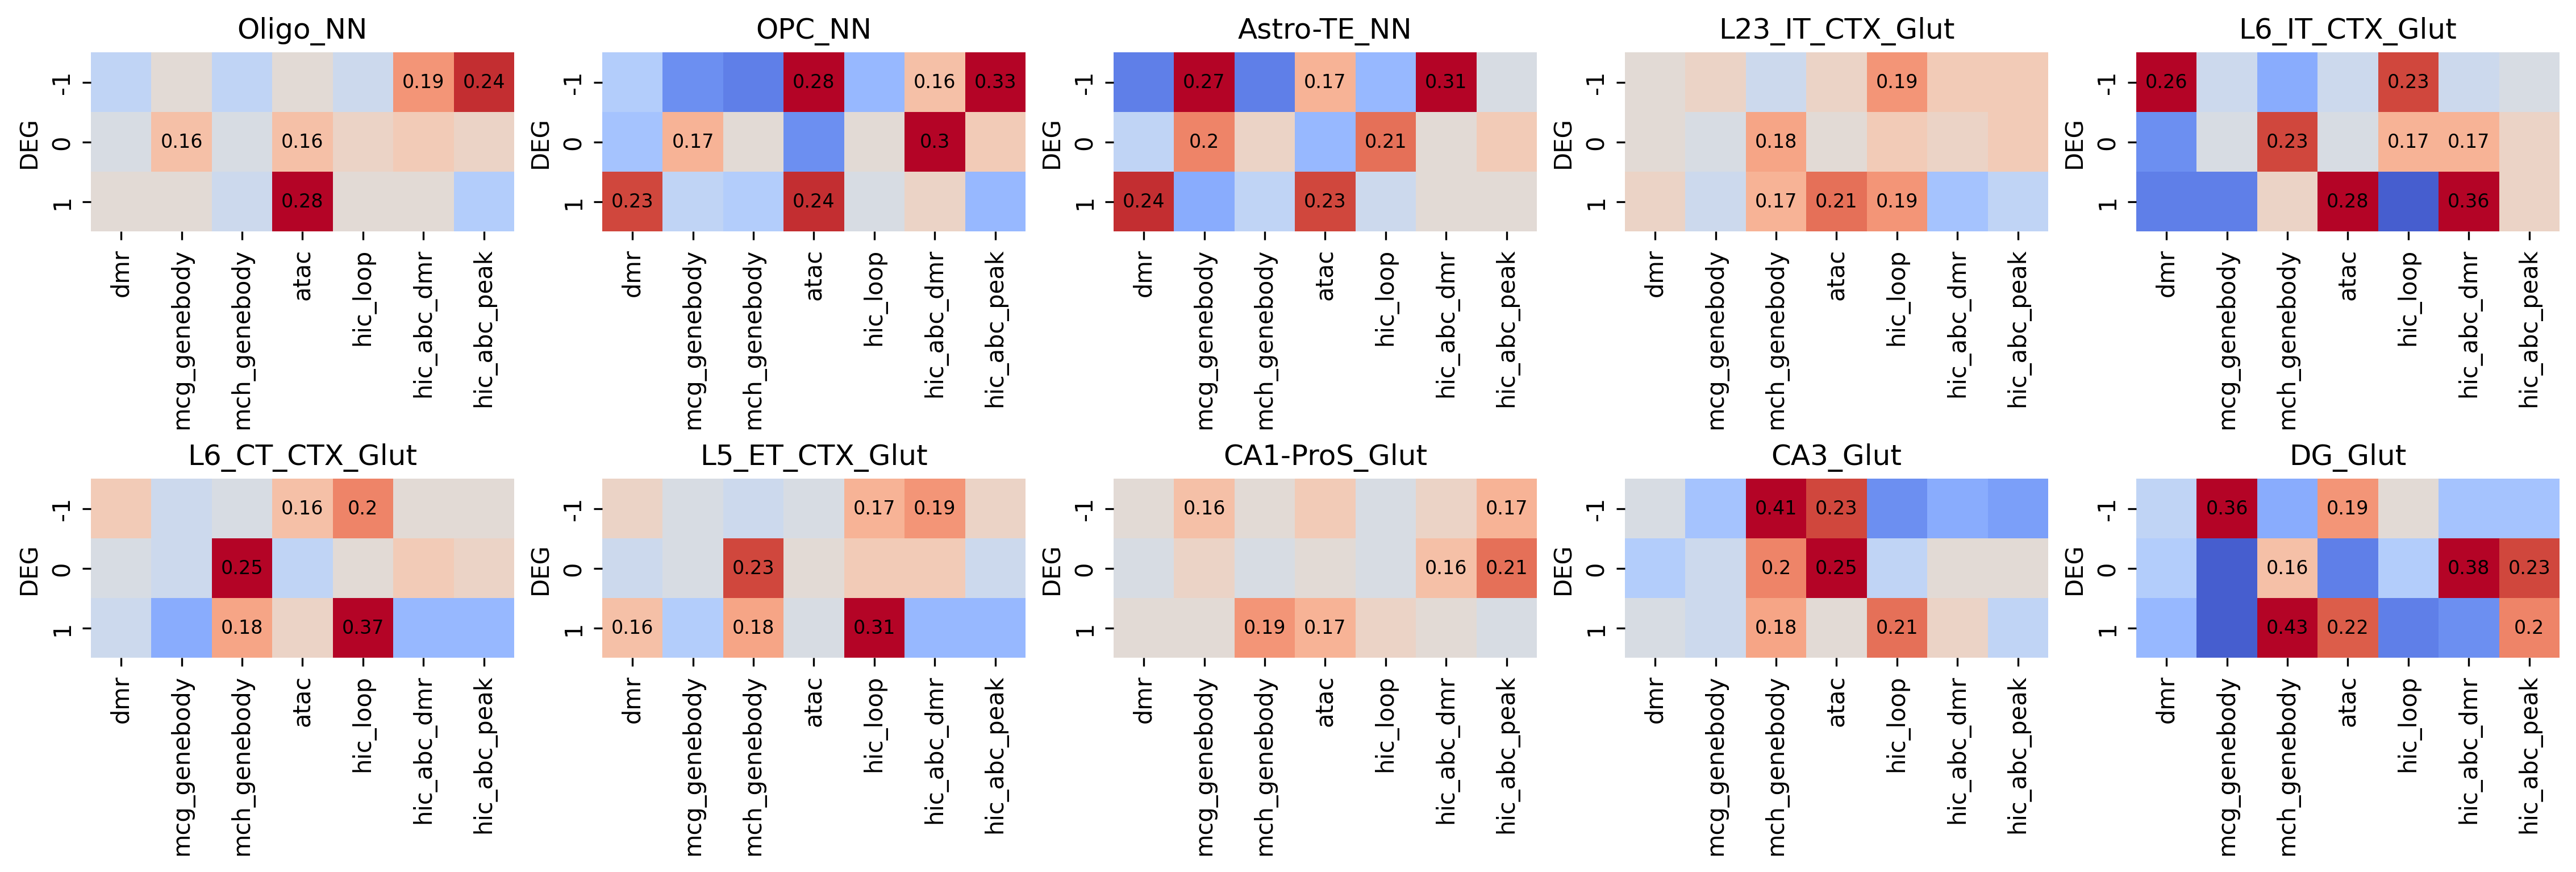

In [10]:
fig, axes = plt.subplots(ncols = 5, nrows =2, figsize=(15, 5), dpi = 300, constrained_layout=True)

for path, ax in zip(all_fps, axes.ravel()):
    ct = path.split('/')[-2]
    ml_out = pd.read_csv(path)
    right_pred = ml_out[ml_out['pred'] == ml_out['DEG']].sort_values('DEG')
    toplot= right_pred.set_index('gene')[['dmr', 'mcg_genebody', 'mch_genebody', 'atac',
                'hic_loop', 'hic_abc_dmr', 'hic_abc_peak','DEG']]
    toplot = toplot.groupby('DEG').mean()
    toplot = round(toplot,2)

    sns.heatmap(toplot, cmap = 'coolwarm', annot=False, vmin = 0, vmax = 0.25, ax = ax)
    # only annotate values > 0.1
    for i in range(toplot.shape[0]):
        for j in range(toplot.shape[1]):
            if toplot.iloc[i,j] > 0.15:
                ax.text(j+0.5, i+0.5, toplot.iloc[i,j], ha='center', va='center', color='black', fontsize=8)
    # remove color bar
    ax.collections[0].colorbar.remove()
    ax.set_title(ct)
#fig.savefig(f"figure/avaraged.attention_weight.pdf", bbox_inches='tight')
    

In [70]:
all_toplot= [] 
for path in all_fps:
    ct = path.split('/')[-2]
    ml_out = pd.read_csv(path)
    right_pred = ml_out[ml_out['pred'] == ml_out['DEG']].sort_values('DEG')
    toplot= right_pred.set_index('gene')[['dmr', 'mcg_genebody', 'mch_genebody', 'atac',
                'hic_loop', 'hic_abc_dmr', 'hic_abc_peak','DEG']]
    toplot = toplot.groupby('DEG').mean()
    toplot = round(toplot,2)
    toplot = toplot.loc[[-1,1]]

    # change to long format
    toplot = toplot.reset_index().melt(id_vars='DEG', var_name='Feature', value_name='AttentionWeight')
    toplot['CellType'] = ct
    all_toplot.append(toplot)

all_toplot = pd.concat(all_toplot)

In [71]:
import joblib
ct_paltette = joblib.load('/data/metadata/AgingMajorType_Palette')

new_ct_paltette ={}
for k, v in ct_paltette.items():
    k = k.replace('/','').replace(' ','_')
    new_ct_paltette[k] = v.replace('/','').replace(' ','_')

/var/tmp/ipykernel_60697/1353081432.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/tmp/ipykernel_60697/1353081432.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


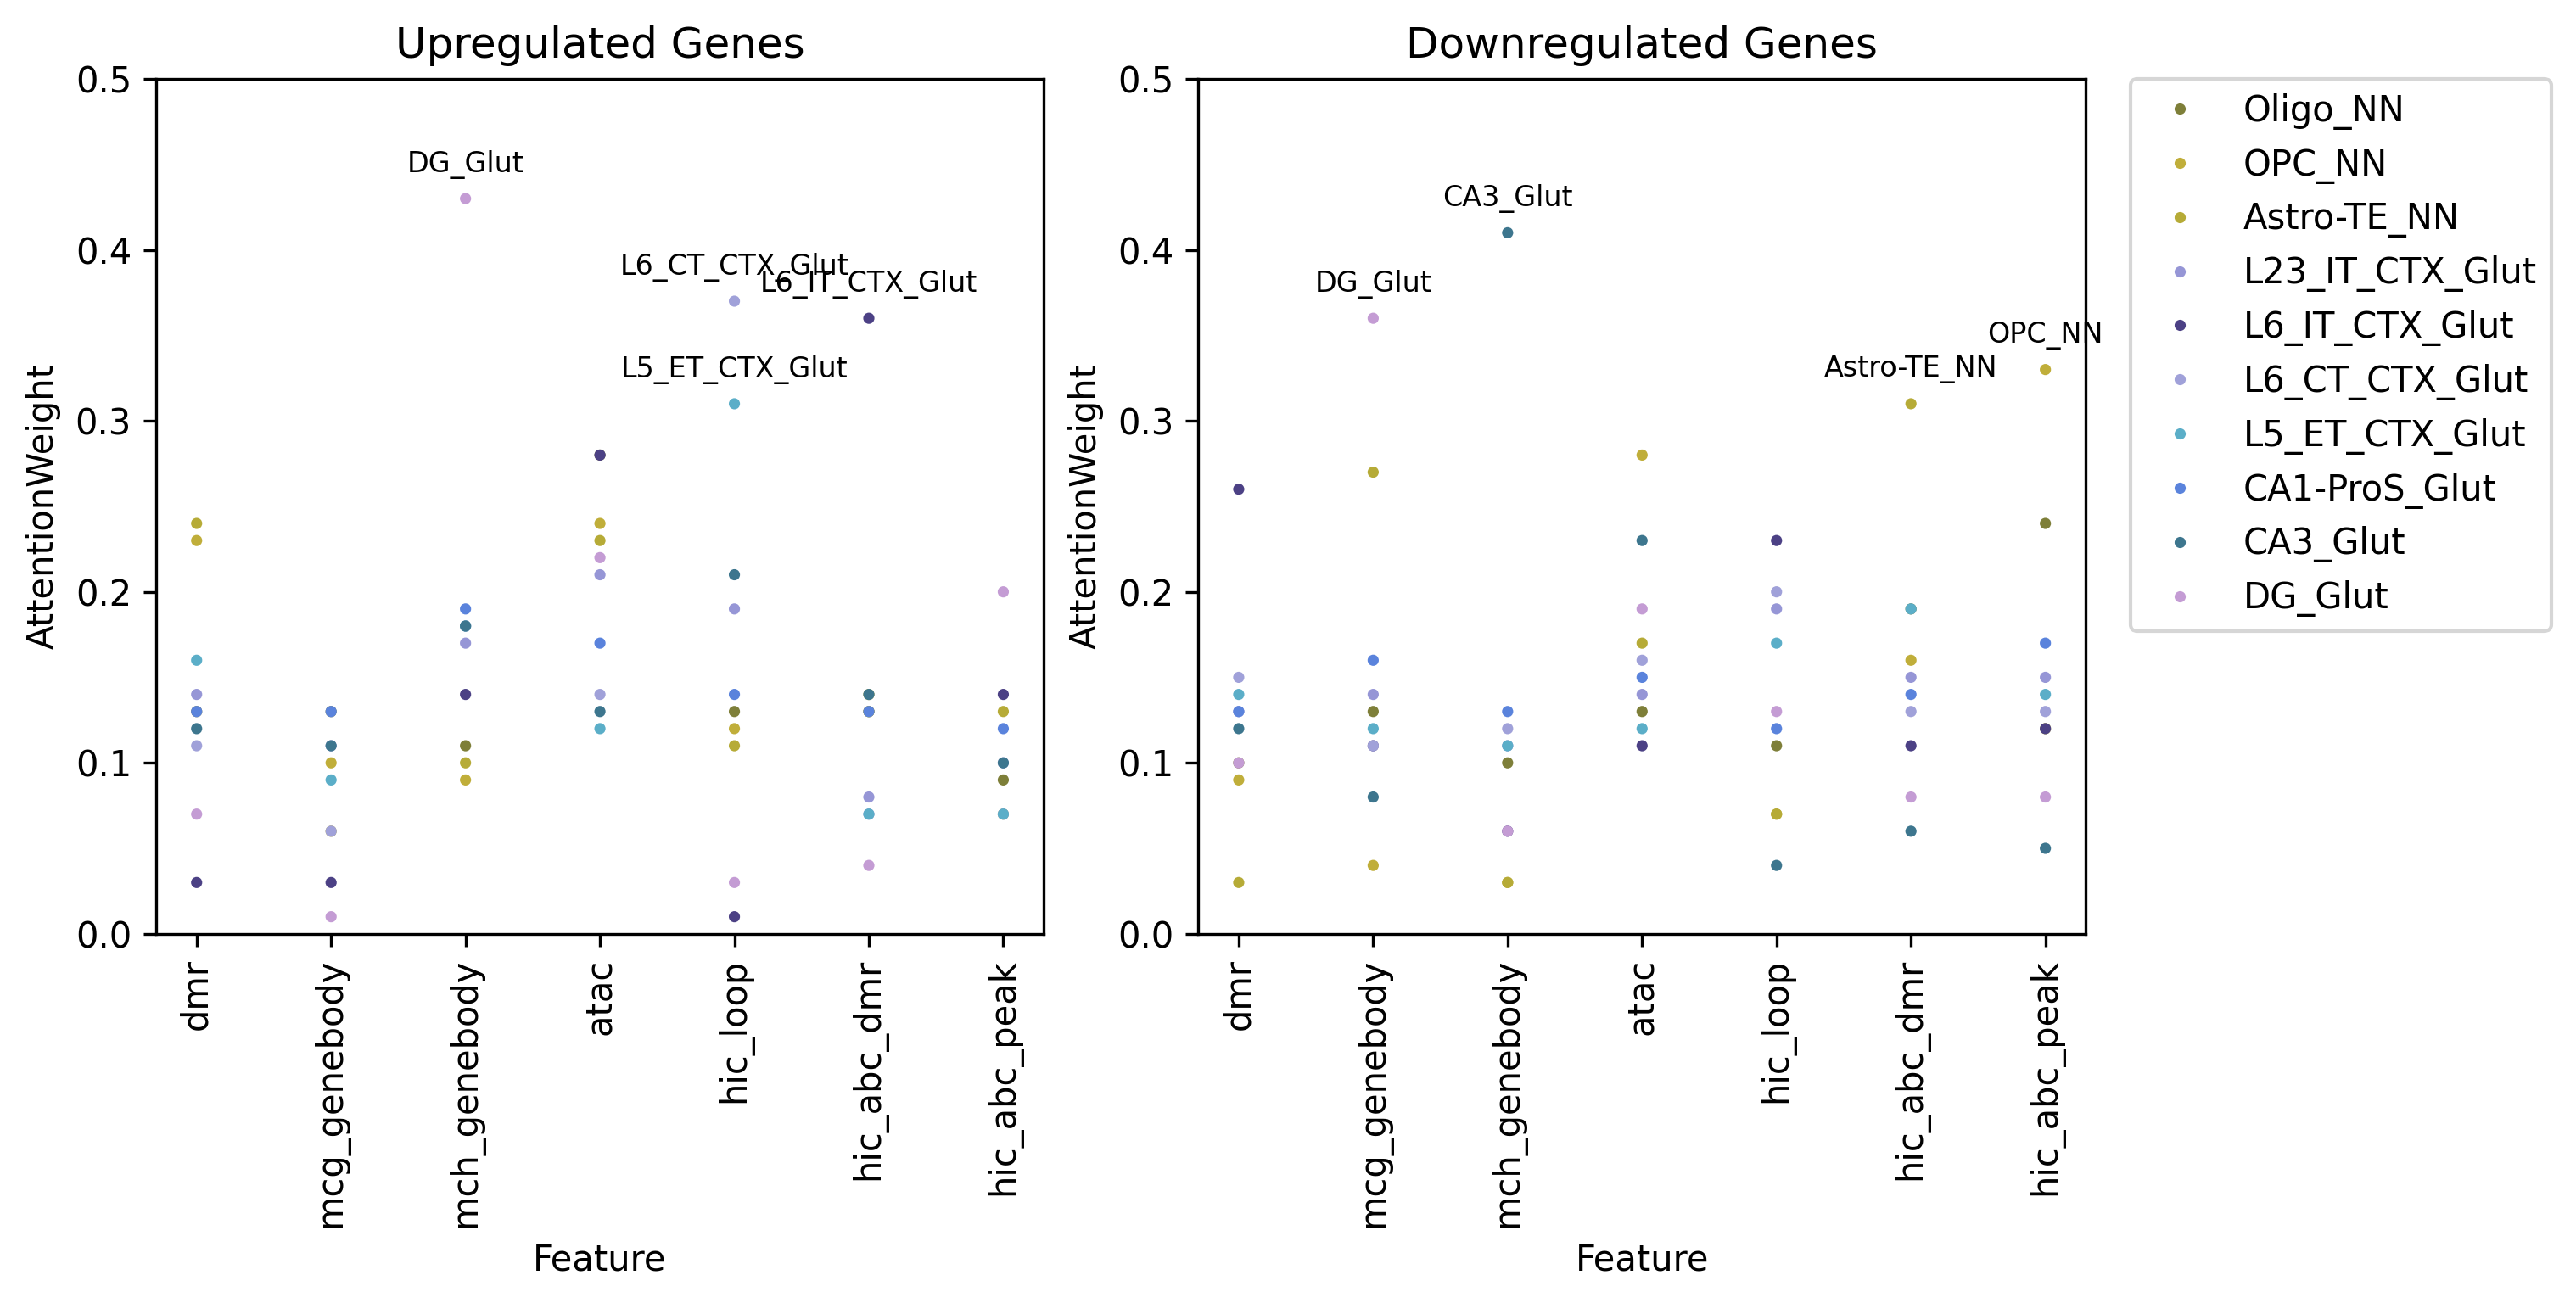

In [125]:
fig, axes = plt.subplots(figsize=(10, 5), ncols = 2, dpi = 300, constrained_layout=True)

ax = axes[0]
tmp_all_toplot = all_toplot[all_toplot['DEG'] == 1]
sns.scatterplot(data = tmp_all_toplot, 
                x = 'Feature', 
                y = 'AttentionWeight', 
                hue = 'CellType', 
                ax = ax,
                linewidth = 0, s = 10,
                palette = new_ct_paltette,
                )

ax.set_ylim(0,0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend([],[], frameon=False)
ax.set_title('Upregulated Genes')

# for cell_type in tmp_all_toplot['CellType'].unique():
#     tmp = tmp_all_toplot[tmp_all_toplot['CellType'] == cell_type]
#     # annotate the point with the max attention weight
#     max_attention_weight_idx = tmp['AttentionWeight'].idxmax()
#     feature = tmp.loc[max_attention_weight_idx, 'Feature']
#     ax.text(feature, 
#             tmp.loc[max_attention_weight_idx, 'AttentionWeight'] + 0.02,
#             cell_type,
#             ha='center',
#             va='center',
#             fontsize=8)
for i in range(len(tmp_all_toplot)):
    if tmp_all_toplot.iloc[i]['AttentionWeight'] > 0.3:
        ax.text(tmp_all_toplot.iloc[i]['Feature'], 
                tmp_all_toplot.iloc[i]['AttentionWeight'] + 0.02,
                tmp_all_toplot.iloc[i]['CellType'],
                ha='center',
                va='center',
                fontsize=8)

ax = axes[1]
tmp_all_toplot = all_toplot[all_toplot['DEG'] == -1]
sns.scatterplot(data = tmp_all_toplot, 
                x = 'Feature', 
                y = 'AttentionWeight', 
                hue = 'CellType', 
                ax = ax,
                linewidth = 0, s = 10,
                palette = new_ct_paltette,
                )

ax.set_ylim(0,0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend([],[], frameon=False)
ax.set_title('Downregulated Genes')

for i in range(len(tmp_all_toplot)):
    if tmp_all_toplot.iloc[i]['AttentionWeight'] > 0.3:
        ax.text(tmp_all_toplot.iloc[i]['Feature'], 
                tmp_all_toplot.iloc[i]['AttentionWeight'] + 0.02,
                tmp_all_toplot.iloc[i]['CellType'],
                ha='center',
                va='center',
                fontsize=8)

# plot legend outside, and legend fontsize as 10
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.001)
fig.savefig(f"figure/scatterplot_attention_weight.pdf", bbox_inches='tight')
plt.show()

In [11]:
all_fps_dict = {"NN":['/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/Oligo_NN/result.csv',
 '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/OPC_NN/result.csv',
 '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/Astro-TE_NN/result.csv',],
"cortex_glut":['/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/L23_IT_CTX_Glut/result.csv',
 '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/L6_IT_CTX_Glut/result.csv',
 '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/L6_CT_CTX_Glut/result.csv',
 '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/L5_ET_CTX_Glut/result.csv'],
"hippo_glut":['/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/CA1-ProS_Glut/result.csv',
 '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/CA3_Glut/result.csv',
 '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/ml_output/DG_Glut/result.csv'],
}
clsses = all_fps_dict.keys()

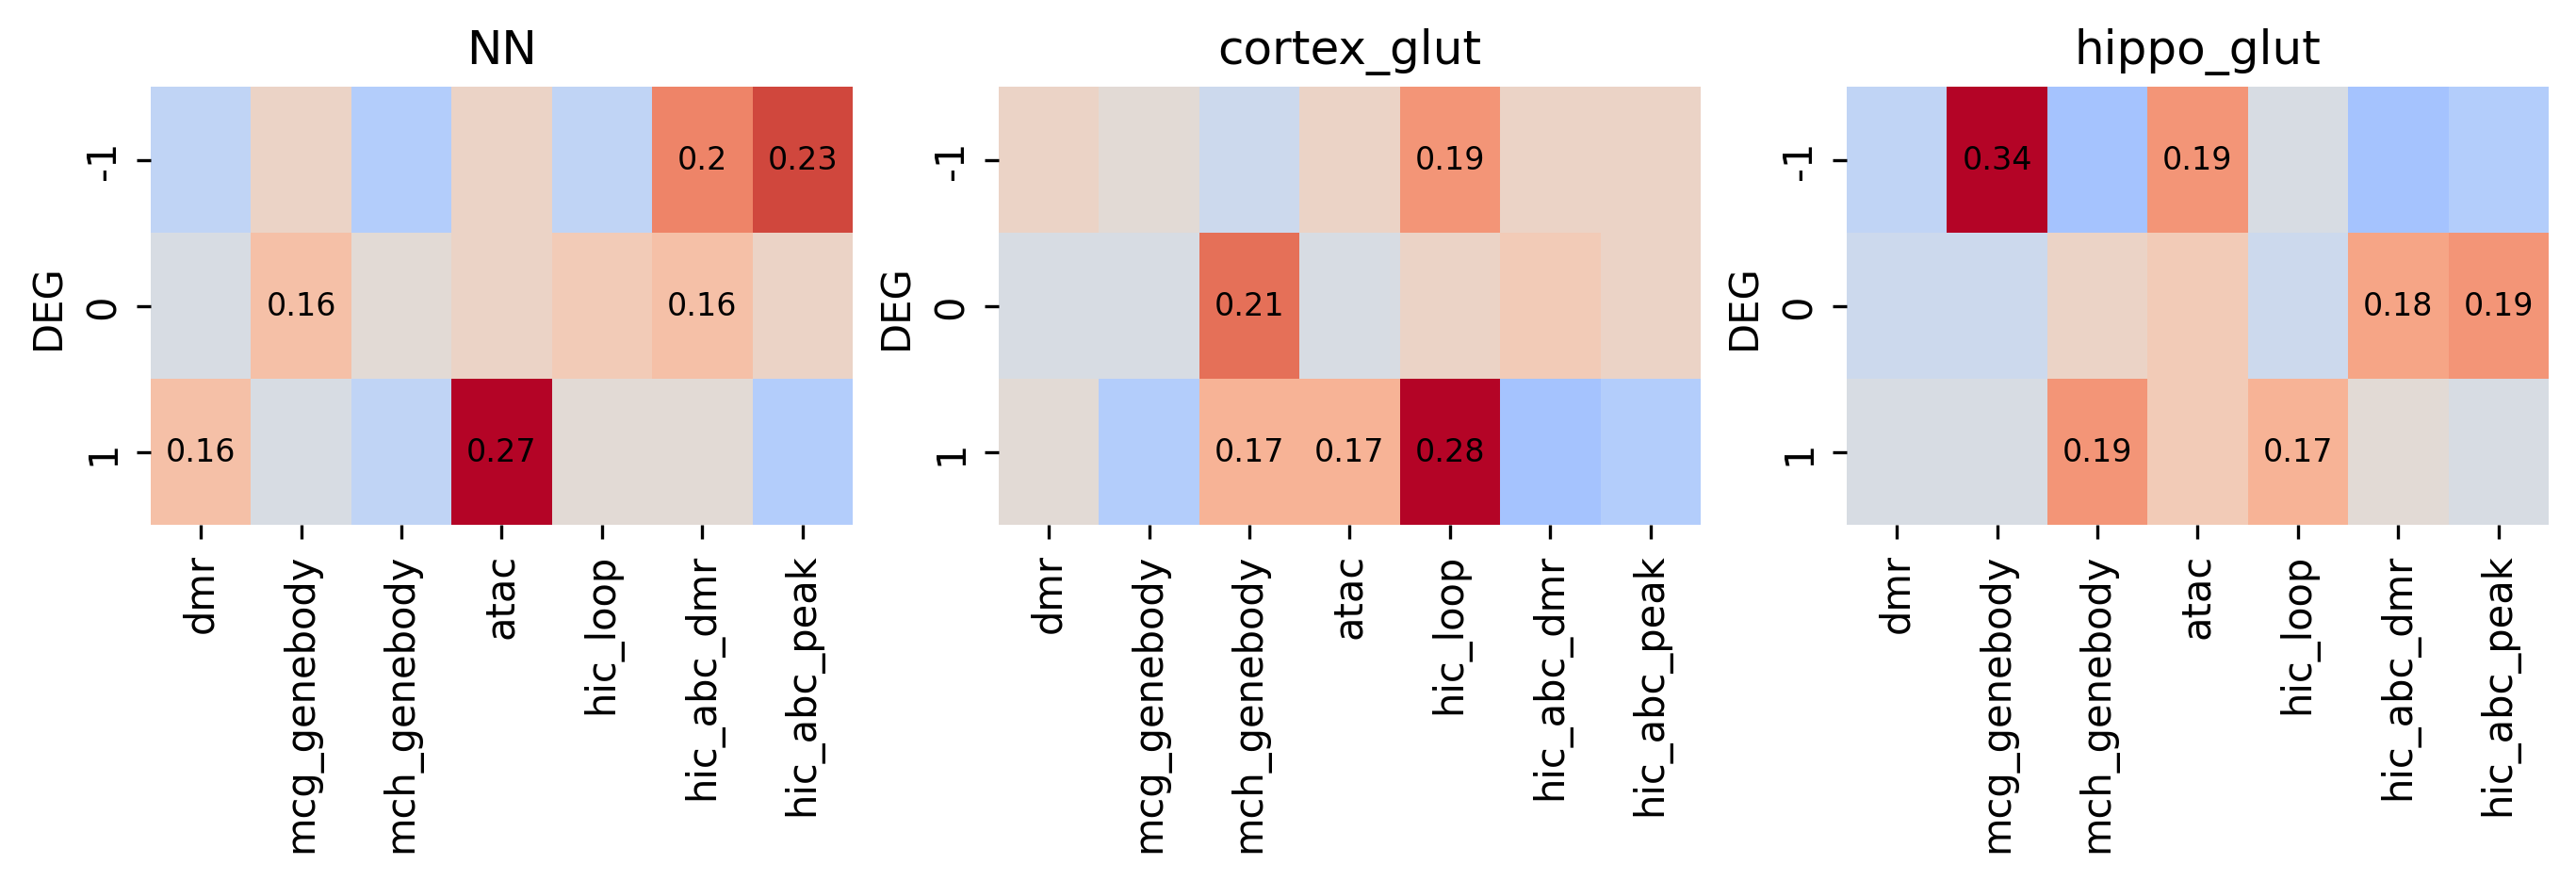

In [12]:
fig, axes = plt.subplots(ncols = 3, nrows =1, figsize=(9, 3), dpi = 300, constrained_layout=True)

for _class, ax in zip(clsses, axes.ravel()):
    all_df = []
    for path in all_fps_dict[_class]:
        ct = path.split('/')[-2]
        ml_out = pd.read_csv(path)
        right_pred = ml_out[ml_out['pred'] == ml_out['DEG']].sort_values('DEG')
        toplot= right_pred.set_index('gene')[['dmr', 'mcg_genebody', 'mch_genebody', 'atac',
                    'hic_loop', 'hic_abc_dmr', 'hic_abc_peak','DEG']]
        all_df.append(toplot)
    all_df = pd.concat(all_df)
    all_df = all_df.groupby('DEG').mean()
    all_df = round(all_df,2)

    sns.heatmap(all_df, cmap = 'coolwarm', annot=False, vmin = 0, vmax = 0.25, ax = ax)
    # only annotate values > 0.1
    for i in range(all_df.shape[0]):
        for j in range(all_df.shape[1]):
            if all_df.iloc[i,j] > 0.15:
                ax.text(j+0.5, i+0.5, all_df.iloc[i,j], ha='center', va='center', color='black', fontsize=8)
    # remove color bar
    ax.collections[0].colorbar.remove()
    ax.set_title(_class)
#fig.savefig(f"figure/avaraged.class_merged.attention_weight.pdf", bbox_inches='tight')
    

In [15]:

# ct = path.split('/')[-2]
# ml_out = pd.read_csv(path)
# right_pred = ml_out[ml_out['pred'] == ml_out['DEG']].sort_values('DEG')
# toplot= right_pred.set_index('gene')[['dmr', 'mcg_genebody', 'mch_genebody', 'atac',
#                 'hic_loop', 'hic_abc_dmr', 'hic_abc_peak']]

# row_annot = right_pred.set_index('gene')[['DEG']]

# # seta paletter where 1 as red, 0 as grey, blue as -1
# palette = {-1: '#4287f5', 0: '#ebedf0', 1: '#f50511'}

# left_ha = pch.HeatmapAnnotation(
#                         label=pch.anno_label(row_annot.DEG,merge=True,extend=False,
#                                             adjust_color=True,luminance=0.75,relpos=(1,0.5), colors = 'black'), #,
#                         DEG_type=pch.anno_simple(row_annot.DEG,legend=True, colors= palette),
#                         verbose=1,axis=0,plot_legend=False)

# plt.figure(figsize=(5, 6))
#fig, ax = plt.subplots(figsize=(5, 6), dpi = 150)

#plt.savefig(f"figure/allDMR-hyper-all.pycomplex.celltype.admr.heatmap.pdf", bbox_inches='tight')

# plt.show()